<a href="https://colab.research.google.com/github/itgwangjin/kaggle/blob/master/House_Prices_Advanced_Regression_Techniques/EDA_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *0. preparation*

## 0-1 Mounting Google Drive  in colab

In [0]:
from google.colab import files
from google.colab import drive
drive.mount('./gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./gdrive


In [0]:
 cd /content/gdrive/My\ Drive/kaggle/House-prices/dataset

/content/gdrive/My Drive/kaggle/House-prices/dataset


## 0-2 Using kaggle api in colab

In [0]:
!mkdir -p ~/.kaggle
!cp ../../kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

    100% |████████████████████████████████| 81kB 3.2MB/s 
    100% |████████████████████████████████| 5.3MB 6.1MB/s 
    100% |████████████████████████████████| 92kB 27.6MB/s 
    100% |████████████████████████████████| 51kB 18.9MB/s 


In [0]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2498           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge       9931            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4096            True  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         35           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       2394           False  
two-sigma-financial-news                       2019-07-15 23:59:00  Featured          $100,000       2927           False  
LANL-Ear

In [0]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

In [0]:
ls

data_description.gdoc  sample_submission.csv  test.csv
data_description.txt   submission.csv         train.csv


## 0-3 Using BigQuery api in colab

In [0]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
project_id = '####'
client = bigquery.Client(project=project_id)

# *1. Before starting the EDA*

절차 어떻게 할까?   
1. 거시적 변수 파악   
 * 결측이 얼마나 있을까?
 * 어떤변수로 구성되어있나?
 * y값의 skew 살펴보기
 * Correlation Matrix Heatmap

2. 미시적 변수 파악   
 * Categorical features vs Numerical Features 나누기   
 * Multivariable Analysis 

3. Feature Tuning   
*각항목에 적용할것*   
(1) Impute missing data and clean data   
(2) Feature Transformation/Engineering
 * Handling Numerical Features
 * Handling Categorical Features   



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sp
import matplotlib.pyplot as plt
import operator
%matplotlib inline

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 1-1 Control the Skewness of y(SalePrice)

In [0]:
from scipy.stats import norm
from scipy import stats

In [0]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")



 mu = 180921.20 and sigma = 79415.29



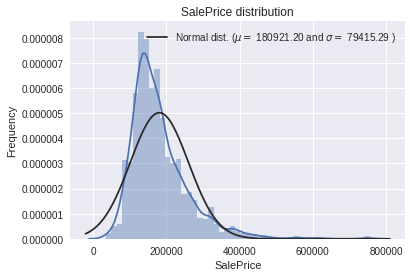

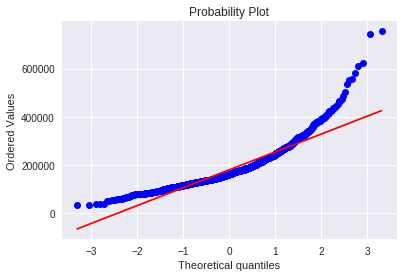

Skewness: 1.882876
Kurtosis: 6.536282


In [0]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())


 mu = 12.02 and sigma = 0.40



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


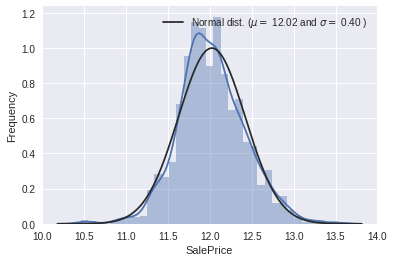

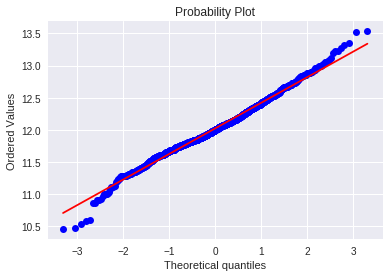

Skewness: 0.121347
Kurtosis: 0.809519


In [0]:
#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel('Frequency')

#Probablity plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

# *2. Correlation analysis *


In [0]:
corr = train.iloc[:,1:].corr()
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64



---

**유의성 기준**   
![유의성기준](https://t1.daumcdn.net/cfile/tistory/994D8B4E5AEA853706)   
단, 0.95가 넘을 경우는 제거

---



In [0]:
corr_list = pd.DataFrame(corr_list)

In [0]:
corr_list.reset_index(level=0, inplace=True)

In [0]:
corr_list[corr_list['SalePrice'] > 0.4]

,index,SalePrice
0,OverallQual,0.817185
1,GrLivArea,0.700927
2,GarageCars,0.680625
3,GarageArea,0.650888
4,TotalBsmtSF,0.612134
5,1stFlrSF,0.596981
6,FullBath,0.594771
7,YearBuilt,0.586570
8,YearRemodAdd,0.565608
9,GarageYrBlt,0.541073


유의성 0.4까지만 보자

## (1) OverallQual
Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)

In [0]:
train['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [0]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


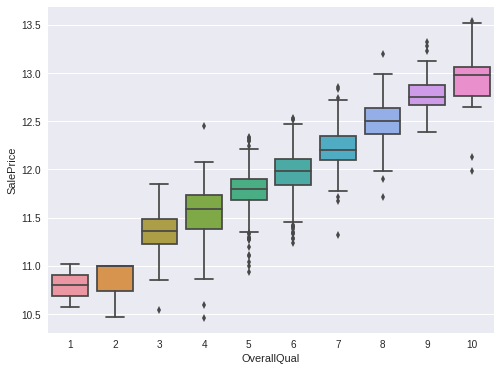

In [0]:
# Overall Quality vs Sale Price
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)


## (2) GrLivArea 
Above grade (ground) living area square feet

In [0]:
train['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


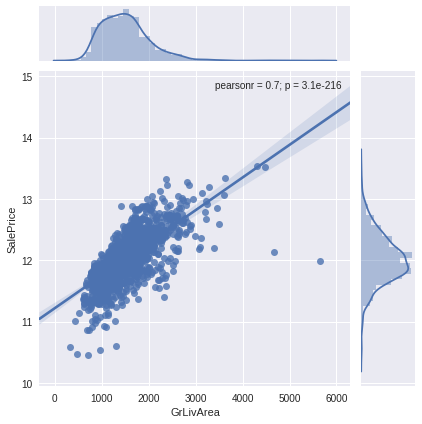

In [0]:
# Living Area vs Sale Price
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg')

오른쪽 아래에 있는 2개의 점을 이상치로 볼 수 있다.
이 이상치에 대한 것을 처리해야한다.


In [0]:
train = train.drop(train[(train['GrLivArea']>4000) 
                         & (train['SalePrice']<12.5)].index).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


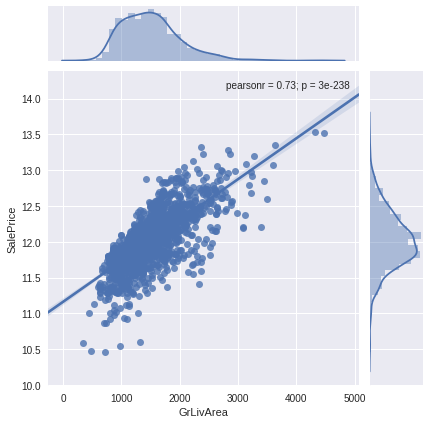

In [0]:
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg')


## (3) GarageCars
Size of garage in car capacity

In [0]:
train['GarageCars'].describe()

count    1458.000000
mean        1.766118
std         0.747104
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [0]:
train['GarageCars'].unique()

array([2, 3, 1, 0, 4])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


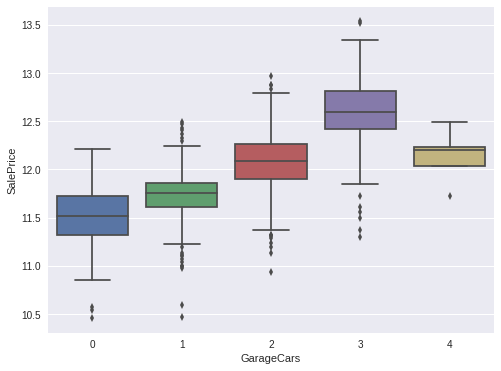

In [0]:
# Overall Quality vs Sale Price
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)


## (4) GarageArea
Size of garage in square feet




In [0]:
train['GarageArea'].describe()

count    1458.000000
mean      472.050069
std       212.239248
min         0.000000
25%       331.500000
50%       479.500000
75%       576.000000
max      1390.000000
Name: GarageArea, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


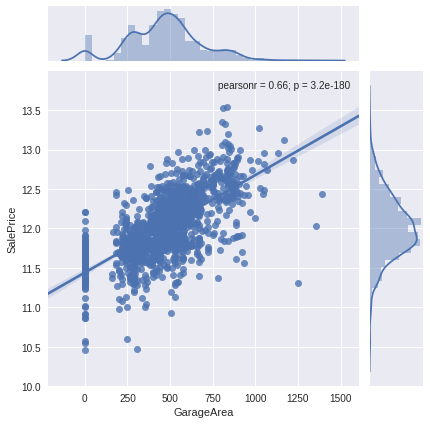

In [0]:
# GarageArea vs Sale Price
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg')

오른쪽 아래에 있는 3개의 점을 이상치로 볼 수 있다.
이 이상치에 대한 것을 처리해야한다.


In [0]:
train = train.drop(train[(train['GarageArea']>1200) 
                         & (train['SalePrice']<12.5)].index).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


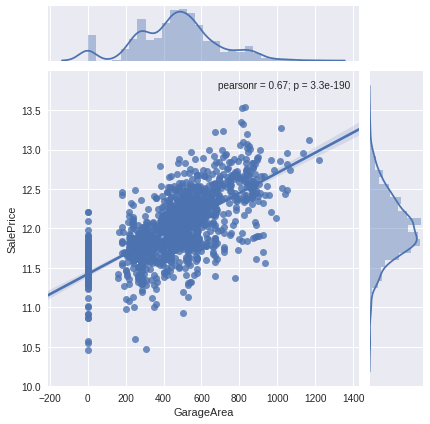

In [0]:
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg')


## (5) TotalBsmtSF 
Total square feet of basement area

In [0]:
train['TotalBsmtSF'].describe()

count    1455.000000
mean     1051.830928
std       414.545500
min         0.000000
25%       795.000000
50%       991.000000
75%      1296.500000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


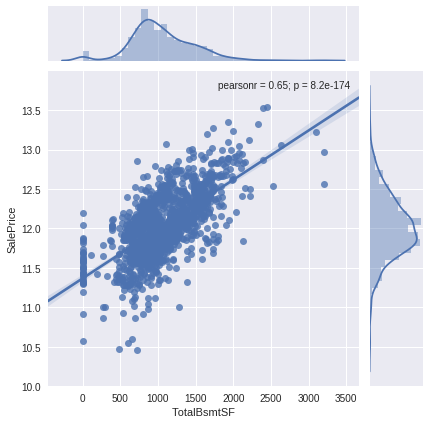

In [0]:
# TotalBsmtSF vs Sale Price
sns.jointplot(x=train['TotalBsmtSF'], y=train['SalePrice'], kind='reg')

## (6) 1stFlrSF 
 First Floor square feet   

In [0]:
train['1stFlrSF'].describe()

count    1455.000000
mean     1158.107904
std       371.438056
min       334.000000
25%       882.000000
50%      1086.000000
75%      1389.500000
max      3228.000000
Name: 1stFlrSF, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


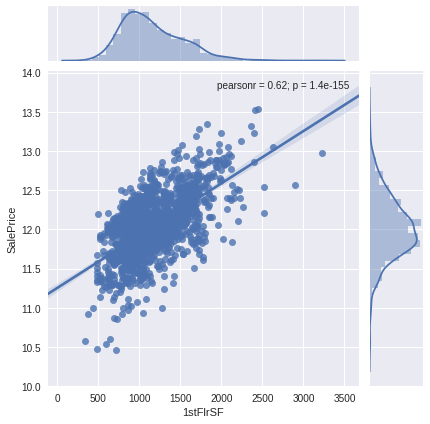

In [0]:
# 1stFlrSF vs Sale Price
sns.jointplot(x=train['1stFlrSF'], y=train['SalePrice'], kind='reg')

## (7) FullBath
Full bathrooms above grade   

In [0]:
train['FullBath'].describe()

count    1455.000000
mean        1.564261
std         0.549942
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

In [0]:
train['FullBath'].unique()

array([2, 1, 3, 0])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


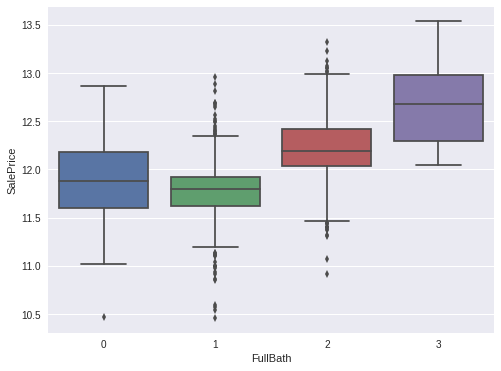

In [0]:
# FullBath vs Sale Price
var = 'FullBath'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)


## (8) TotRmsAbvGrd 
Total rooms above grade (does not include bathrooms)   

In [0]:
train['TotRmsAbvGrd'].describe()

count    1455.000000
mean        6.509966
std         1.616968
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


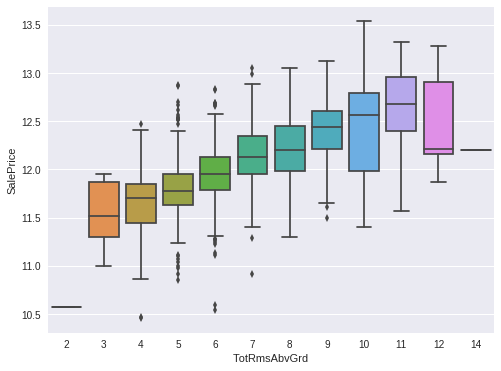

In [0]:
# TotRmsAbvGrd vs Sale Price
var = 'TotRmsAbvGrd'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

## (9) YearBuilt 
Original construction date   

In [0]:
train['YearBuilt'].describe()

count    1455.000000
mean     1971.224742
std        30.193365
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


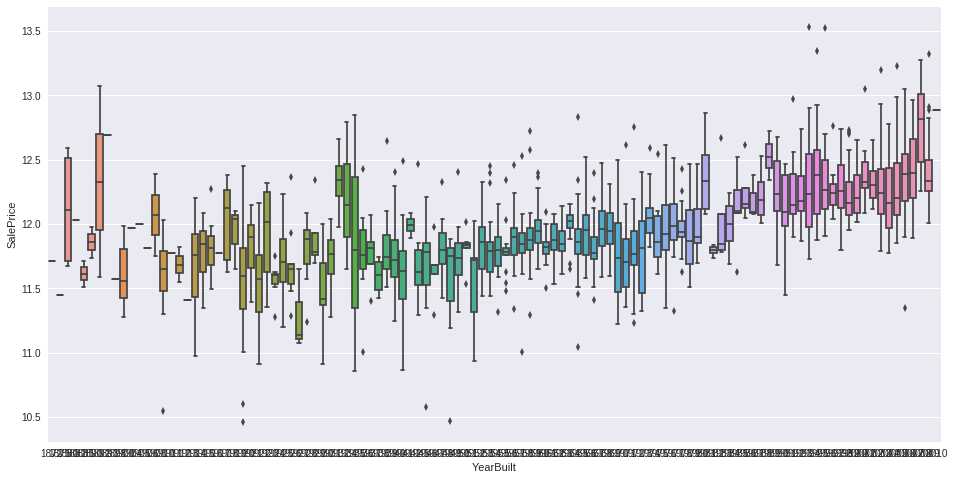

In [0]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

## (10) YearRemodAdd 
Remodel date (sameas construction date if no remodeling or additions)   

In [0]:
train['YearRemodAdd'].describe()

count    1455.000000
mean     1984.848110
std        20.631492
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


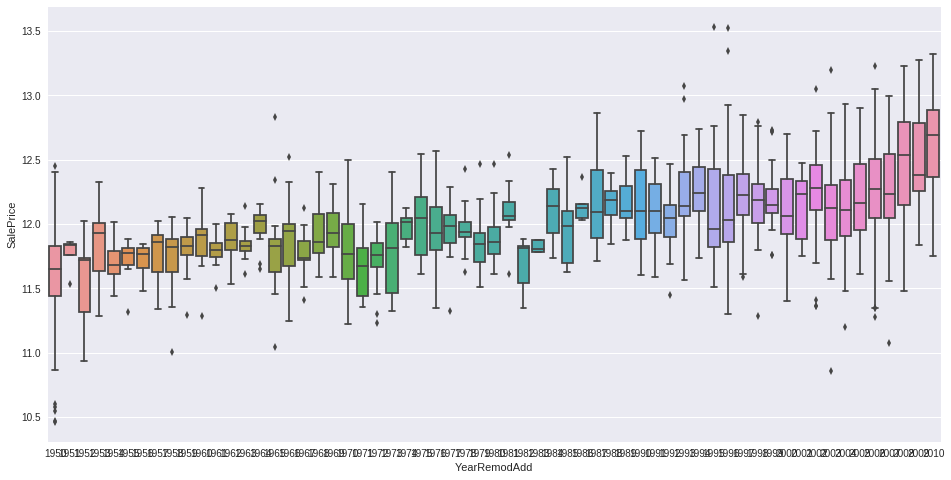

In [0]:
var = 'YearRemodAdd'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

## (11) GarageYrBlt 
Year garage was built      

In [0]:
train['GarageYrBlt'].describe()

count    1374.000000
mean     1978.433042
std        24.692329
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


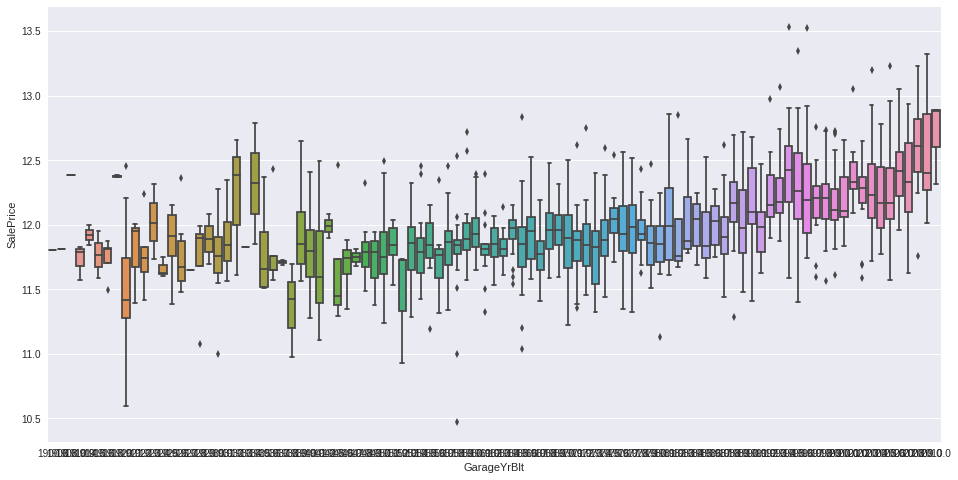

In [0]:
var = 'GarageYrBlt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

## (12) MasVnrArea 
Masonry veneer area in square feet   

In [0]:
train['MasVnrArea'].describe()

count    1447.000000
mean      102.652384
std       179.524183
min         0.000000
25%         0.000000
50%         0.000000
75%       164.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


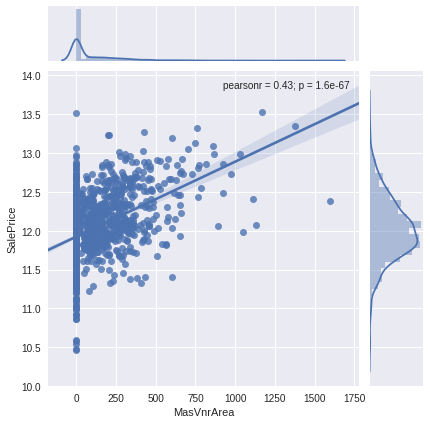

In [0]:
# MasVnrArea vs Sale Price
sns.jointplot(x=train['MasVnrArea'], y=train['SalePrice'], kind='reg')

이상치 처리


In [0]:
train = train.drop(train[(train['MasVnrArea']>1500) 
                         & (train['SalePrice']<12.5)].index).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


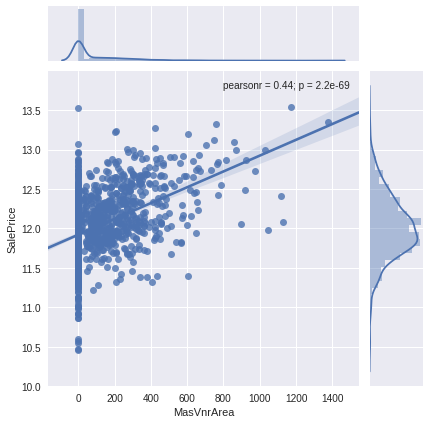

In [0]:
sns.jointplot(x=train['MasVnrArea'], y=train['SalePrice'], kind='reg')


## (13) Fireplaces 
Number of fireplaces    

In [0]:
train['Fireplaces'].describe()

count    1454.000000
mean        0.610729
std         0.642428
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


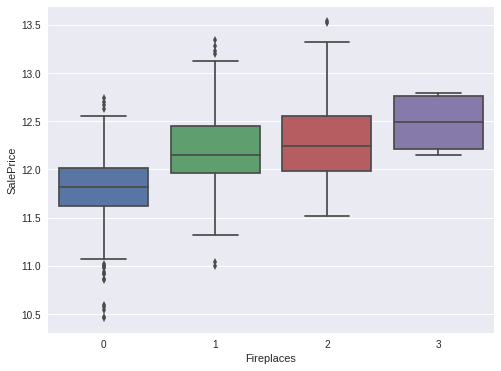

In [0]:
# Fireplaces vs Sale Price
var = 'Fireplaces'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

# *3. Data Cleansing*

In [0]:
all_data = pd.concat([train, test]).reset_index(drop=True)
null_values = all_data.isnull().sum()
sorted_null_values = sorted(null_values.items(), reverse=True, key=operator.itemgetter(1))

print("%15s| %5s|%12s" % ("Attribute", "Null_Val", "Data Type"))
print('-'*50)
for (k, v) in sorted_null_values:
    if v > 0:
        print("%15s %5d %12s" % (k, v, all_data[k].dtype))

      Attribute| Null_Val|   Data Type
--------------------------------------------------
         PoolQC  2904       object
    MiscFeature  2809       object
          Alley  2716       object
          Fence  2342       object
      SalePrice  1459      float64
    FireplaceQu  1419       object
    LotFrontage   485      float64
     GarageCond   159       object
   GarageFinish   159       object
     GarageQual   159       object
    GarageYrBlt   159      float64
     GarageType   157       object
       BsmtCond    82       object
   BsmtExposure    82       object
       BsmtQual    81       object
   BsmtFinType2    80       object
   BsmtFinType1    79       object
     MasVnrType    24       object
     MasVnrArea    23      float64
       MSZoning     4       object
   BsmtFullBath     2      float64
   BsmtHalfBath     2      float64
     Functional     2       object
      Utilities     2       object
     BsmtFinSF1     1      float64
     BsmtFinSF2     1      float64


PoolQC  2904       object   
=>        NA	No Pool

MiscFeature  2809       object   
=> NA	None   

Alley  2716       object   
=> NA 	No alley access

Fence  2342       object   
=>   NA	No Fence

SalePrice  1459      float64   
=> 이건 testset에 없는게 당연   

FireplaceQu  1419       object   
=>        NA	No Fireplace   

LotFrontage   485      float64   
=> Linear feet of street connected to property   
==> median

GarageCond   159       object   
=>  NA	No Garage

GarageFinish   159       object   
=> NA	No Garage   
...   
==> Related  Garage   
===> object -> None   
===> float -> 0   

Related Bsmt
=> object -> None
=> float -> 0

In [0]:
corrLot = train.iloc[:,1:].corr()
corrLot = corr['LotFrontage'].sort_values(axis=0,ascending=False).iloc[1:]
corrLot

1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
SalePrice        0.355879
TotRmsAbvGrd     0.352096
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFrontage, dtype: float64

In [0]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')
all_data['Alley'] = all_data['Alley'].fillna('None')
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data["LotFrontage"] = all_data.groupby("1stFlrSF")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [0]:
all_data["LotFrontage"] = all_data.groupby("1stFlrSF")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))         

In [0]:
null_values = all_data.isnull().sum()
sorted_null_values = sorted(null_values.items(), reverse=True, key=operator.itemgetter(1))

print("%15s| %5s|%12s" % ("Attribute", "Null_Val", "Data Type"))
print('-'*50)
for (k, v) in sorted_null_values:
    if v > 0:
        print("%15s %5d %12s" % (k, v, all_data[k].dtype))

      Attribute| Null_Val|   Data Type
--------------------------------------------------
      SalePrice  1459      float64
    LotFrontage    83      float64
     MasVnrType    24       object
     MasVnrArea    23      float64
       MSZoning     4       object
     Functional     2       object
      Utilities     2       object
     Electrical     1       object
    Exterior1st     1       object
    Exterior2nd     1       object
    KitchenQual     1       object
       SaleType     1       object


In [0]:
all_data["LotFrontage"] = all_data.groupby("LotArea")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

In [0]:
null_values = all_data.isnull().sum()
sorted_null_values = sorted(null_values.items(), reverse=True, key=operator.itemgetter(1))

print("%15s| %5s|%12s" % ("Attribute", "Null_Val", "Data Type"))
print('-'*50)
for (k, v) in sorted_null_values:
    if v > 0:
        print("%15s %5d %12s" % (k, v, all_data[k].dtype))

      Attribute| Null_Val|   Data Type
--------------------------------------------------
      SalePrice  1459      float64
    LotFrontage    69      float64
     MasVnrType    24       object
     MasVnrArea    23      float64
       MSZoning     4       object
     Functional     2       object
      Utilities     2       object
     Electrical     1       object
    Exterior1st     1       object
    Exterior2nd     1       object
    KitchenQual     1       object
       SaleType     1       object


In [0]:
all_data["LotFrontage"] = all_data.groupby("GrLivArea")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))        

In [0]:
null_values = all_data.isnull().sum()
sorted_null_values = sorted(null_values.items(), reverse=True, key=operator.itemgetter(1))

print("%15s| %5s|%12s" % ("Attribute", "Null_Val", "Data Type"))
print('-'*50)
for (k, v) in sorted_null_values:
    if v > 0:
        print("%15s %5d %12s" % (k, v, all_data[k].dtype))

      Attribute| Null_Val|   Data Type
--------------------------------------------------
      SalePrice  1459      float64
    LotFrontage    31      float64
     MasVnrType    24       object
     MasVnrArea    23      float64
       MSZoning     4       object
     Functional     2       object
      Utilities     2       object
     Electrical     1       object
    Exterior1st     1       object
    Exterior2nd     1       object
    KitchenQual     1       object
       SaleType     1       object


In [0]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mode()[0])
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])
all_data["Functional"] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [0]:
null_values = all_data.isnull().sum()
sorted_null_values = sorted(null_values.items(), reverse=True, key=operator.itemgetter(1))

print("%15s| %5s|%12s" % ("Attribute", "Null_Val", "Data Type"))
print('-'*50)
for (k, v) in sorted_null_values:
    if v > 0:
        print("%15s %5d %12s" % (k, v, all_data[k].dtype))

      Attribute| Null_Val|   Data Type
--------------------------------------------------
      SalePrice  1459      float64


# *4. Feature Tuning*

## 4-1.  Tuning Categorical feature 

In [0]:
obj_data = all_data.dtypes[all_data.dtypes == "object"].index

In [0]:
numeric_data = all_data.dtypes[all_data.dtypes != 'object'].index

In [0]:
numeric_data, obj_data

(Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
        'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
        'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
        'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
        'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
        'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
        'YearBuilt', 'YearRemodAdd', 'YrSold'],
       dtype='object'),
 Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
        'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
        'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
        'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
        'Hous

In [0]:
for col in obj_data:
  print('title : {} len unique = {} \n{}\n'.format(col,len(all_data[col].unique()), all_data[col].unique()))
  print('*'*50)

title : Alley len unique = 3 
['None' 'Grvl' 'Pave']

**************************************************
title : BldgType len unique = 5 
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

**************************************************
title : BsmtCond len unique = 5 
['TA' 'Gd' 'None' 'Fa' 'Po']

**************************************************
title : BsmtExposure len unique = 5 
['No' 'Gd' 'Mn' 'Av' 'None']

**************************************************
title : BsmtFinType1 len unique = 7 
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']

**************************************************
title : BsmtFinType2 len unique = 7 
['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']

**************************************************
title : BsmtQual len unique = 5 
['Gd' 'TA' 'Ex' 'None' 'Fa']

**************************************************
title : CentralAir len unique = 2 
['Y' 'N']

**************************************************
title : Condition1 len unique = 9 
['Norm' 'Feedr' 'Pos

In [0]:
# 정도를 나타내는 Categorical features들을 라벨링 시켜주자.

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))


## 4-2 Tuning Numeric data

In [0]:
ntrain = train.shape[0]

In [0]:
# Id & SalePrice 열 처리
train_ID = all_data.loc[:ntrain - 1,['Id']] # : 뒤에오는 애까지 가져오기 때문에 1 빼준다.
test_ID = all_data.loc[ntrain:,['Id']].reset_index(drop=True)      # 시작은 포함되서 나온다.
y_train = all_data.loc[:ntrain - 1,['SalePrice']]

# Id 열 처리
all_data = all_data.drop(['Id','SalePrice'], axis = 1)

In [0]:
print(all_data['MSSubClass'].dtype)

int64


In [0]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype('object')

In [0]:
print(all_data['MSSubClass'].dtype)

object


In [0]:
obj_data = all_data.dtypes[all_data.dtypes == "object"].index

In [0]:
num_data = all_data.dtypes[all_data.dtypes != "object"].index

In [0]:
obj_data

Index(['BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle',
       'LandContour', 'LotConfig', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Utilities'],
      dtype='object')

In [0]:
num_data

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'ScreenPorch',
       'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [0]:
all_data[obj_data].iloc[:,:20].describe()

,BldgType,Condition1,Condition2,Electrical,Exterior1st,Exterior2nd,Foundation,GarageType,Heating,HouseStyle,LandContour,LotConfig,MSSubClass,MSZoning,MasVnrType,MiscFeature,Neighborhood,RoofMatl,RoofStyle,SaleCondition
count,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913,2913
unique,5,9,8,5,15,16,6,7,6,8,4,5,16,5,4,5,25,7,6,6
top,1Fam,Norm,Norm,SBrkr,VinylSd,VinylSd,PConc,Attchd,GasA,1Story,Lvl,Inside,0,RL,None,None,NAmes,CompShg,Gable,Normal
freq,2420,2507,2884,2666,1024,1013,1304,1721,2868,1468,2620,2128,1078,2265,1765,2809,443,2871,2308,2399


In [0]:
all_data[obj_data].iloc[:,20:].describe()

,SaleType,Utilities
count,2913,2913
unique,9,2
top,WD,AllPub
freq,2524,2912


In [0]:
all_data = all_data.drop(['Utilities'],axis=1)

### Skew 조정

In [0]:
from scipy.stats import skew

# Check the skew of all numerical features
skewed_feats = all_data[num_data].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
MiscVal,21.934376
PoolArea,17.676417
LotArea,13.159845
LowQualFinSF,12.076090
3SsnPorch,11.364106


In [0]:
skewness = skewness[abs(skewness["Skewed Features"]) > 0.75]

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    all_data[feat] += 1

There are 36 skewed numerical features to Box Cox transform


## 4-3 Get Dummies

In [0]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2913, 234)


In [0]:
train = all_data[:train.shape[0]]
test = all_data[train.shape[0]:].reset_index(drop=True)

# Modeling

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
model_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
model_KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
model_GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1100 (0.0068)

ElasticNet score: 0.1100 (0.0068)

Kernel Ridge score: 0.1774 (0.0066)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Gradient Boosting score: 0.1156 (0.0061)

Xgboost score: 0.1181 (0.0069)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LGBM score: 0.1162 (0.0059)



In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.04243944708216841


In [0]:
model_lasso.fit(train, y_train)
lasso_train_pred = model_lasso.predict(train)
lasso_pred = np.expm1(model_lasso.predict(test))
print(rmsle(y_train, lasso_train_pred))

0.10034209982133235


In [0]:
model_ENet.fit(train, y_train)
ENet_train_pred = model_ENet.predict(train)
ENet_pred = np.expm1(model_ENet.predict(test))
print(rmsle(y_train, ENet_train_pred))

0.09976112690603398


In [0]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test))
print(rmsle(y_train, lgb_train_pred))

0.0729414689458942


In [0]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = xgb_pred
sub.to_csv('submission.csv',index=False)

In [0]:
!kaggle competitions submit house-prices-advanced-regression-techniques -f submission.csv -m "My final submission message"

100% 21.1k/21.1k [00:06<00:00, 3.17kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques